<a href="https://colab.research.google.com/github/seusik1122/2025-1-myclass-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#13 주차 BTS 댓글 워드 클라우드

In [32]:
!pip install koreanize-matplotlib

In [33]:
import koreanize_matplotlib

In [34]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/71/task/71/net’: Invalid argument
find: ‘/proc/71/net’: Invalid argument


In [35]:
FONT_PATH = "/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf"

In [36]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [37]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [38]:
!pip install konlpy

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [41]:
df = pd.read_csv("data/news_comment_BTS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [42]:
df.sample(5)

,reg_time,reply,press,title,url
837,2020-09-01 03:10:47,방탄은 월클이다,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
608,2020-09-01 08:29:30,정말 자랑스럽고 또 자랑스럽다 .,뉴스원,"BTS, 다이너마이트 빌보드 '핫100' 1위로 데뷔…""역사 썼다""(종합)",https://news.naver.com/main/read.nhn?mode=LSD&...
304,2020-09-01 05:34:37,ㄴ짜짱임앞으로도쭉최고가되길BTS짱,중앙일보,BTS '다이너마이트' 터졌다···韓 가수 최초 빌보드 싱글1위,https://news.naver.com/main/read.nhn?mode=LSD&...
672,2020-09-01 07:35:20,제가 잘몰라서 그러는데 홈페이지에서 hot100에 들어갔는데\n안보이거든요. 나중에...,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
514,2020-09-01 08:54:57,군대 보내지말구 나라를위해 계속 일할수있게해주시면좋겠네요 부채도많은데~\nBT...,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...


In [43]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [44]:
df['reply'].str.replace('[^가-힣]', '', regex=True)

,reply
0,국보소년단
1,아줌마가들어도좋더라
2,팩트체크현재빌보드위방탄소년단위위위위위위위위위
3,방탄소년단이한국사람이라너무자랑스러워요우리오래오래함께하자
4,대단한월드클래스는다르네좋은소식응원해요
...,...
1195,역시
1196,우리탄이들너무자랑스럽고사랑해
1197,이런애들꼭군대를보내는게맞을까요
1198,군면제급이다이건


In [45]:
df['reply']= df['reply'].str.replace('[^가-힣]', '', regex=True)
df['reply'].sample(5)

,reply
189,역시우리탄이들축하해
538,군면제해줘라이만큼국위선양하는데
641,너무너무자랑스럽다그어려움을뚫고디뎌위를하다니사랑해그리고정국아생일축하해태어나줘서리방탄이...
209,펭수는
594,우와하루종일실검위메인뉴스에위치해야할대단한소식인듯합니다대단해요방탄소년단


In [46]:
from konlpy.tag import Hannanum
han = Hannanum()
han.nouns(u"질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요")

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [47]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.nouns(u"질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요")

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [57]:
mydf = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [4, 5, 6, 7]})
mydf

,A,B
0,1,4
1,2,5
2,3,6
3,4,7


In [58]:
mydf.apply([lambda x : x**2])

,A,B
,<lambda>,<lambda>
0,1,16
1,4,25
2,9,36
3,16,49


In [50]:
nouns = df['reply'].apply(kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[위, 팩트, 방탄, 소년, 팩트체크, 소년단위, 위위위위, 체크, 보드, 단위, ..."
3,"[방탄, 한국, 자랑, 소년단, 한국사람, 사람, 우리, 하자]"
4,"[월드, 클래스, 소식, 소식응원, 응원]"
...,...
1195,[]
1196,"[우리, 이, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급, 다이, 다이건, 건]"


In [56]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,위
...,...
1199,남
1199,박지
1199,전
1199,전정국


In [53]:
test = pd.DataFrame({'A': [[1, 2, 3], 'foo', [], [3, 4]],
                     'B': [1, 1, 1, 1],
                     'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [54]:
test.explode('A') #기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [55]:
test.explode('A', 'C')

,A,B,C
0,1,1,"[a, b, c]"
1,2,1,"[a, b, c]"
2,3,1,"[a, b, c]"
3,foo,1,NaN
4,NaN,1,[]
5,3,1,"[d, e]"
6,4,1,"[d, e]"


In [61]:
test.explode(['A', 'C'])

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [63]:
df_word = pd.DataFrame({'word': nouns})
df_word.sample(5)

,word
667,차트
641,생일
30,비
920,가수
566,시대


In [64]:
df_word['len'] = df_word['word'].str.len()
df_word= df_word.query('len >=2')
df_word.sample(5)

,word,len
690,청년,2.0
1150,여러분,3.0
235,나도한수아래,6.0
681,한번,2.0
408,나울,2.0


In [68]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
64,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [71]:
df_word = df_word.groupby('word', as_index=False)\
                         .agg(n=('word', 'count'))\
                        .sort_values('n', ascending=False)
df_word

,word,n
2921,힘내어,1
0,가개월,1
1,가게,1
2,가격,1
3,가관,1
...,...,...
14,가성,1
13,가사,1
12,가보,1
11,가방,1


In [73]:
top20 = df_word.head(20)
top20

,word,n
2921,힘내어,1
0,가개월,1
1,가게,1
2,가격,1
3,가관,1
4,가능,1
5,가도,1
6,가락,1
7,가면,1
8,가모,1


<Axes: xlabel='n', ylabel='word'>

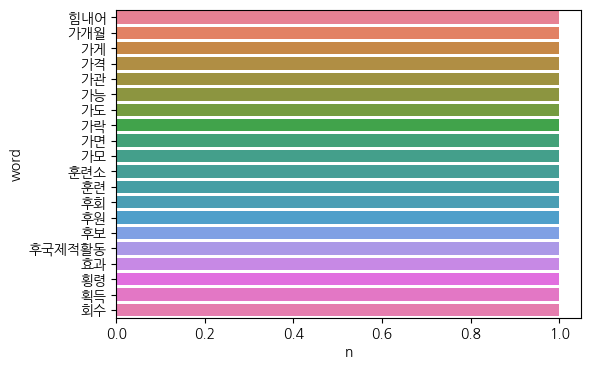

In [78]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top20, y='word', x='n', hue ='word')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
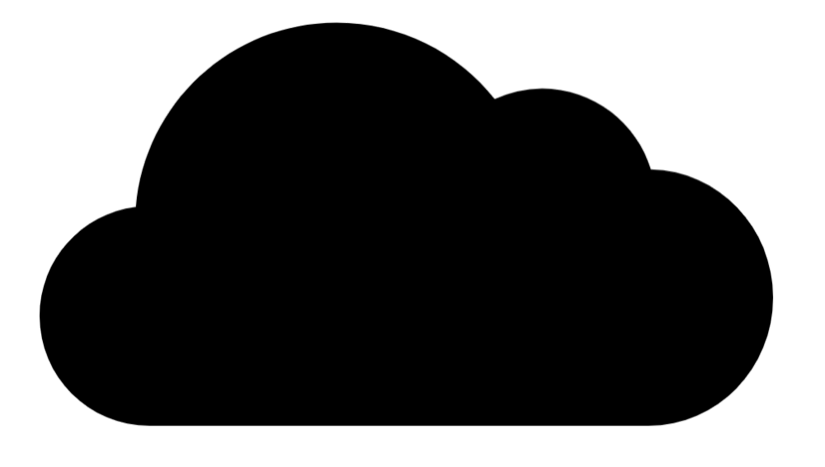

In [80]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)

img = np.array(img)
img

In [81]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 2921 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2922 non-null   object
 1   n       2922 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.5+ KB


In [83]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'힘내어': 1,
 '가개월': 1,
 '가게': 1,
 '가격': 1,
 '가관': 1,
 '가능': 1,
 '가도': 1,
 '가락': 1,
 '가면': 1,
 '가모': 1,
 '훈련소': 1,
 '훈련': 1,
 '후회': 1,
 '후원': 1,
 '후보': 1,
 '후국제적활동': 1,
 '효과': 1,
 '횡령': 1,
 '획득': 1,
 '회수': 1,
 '회사': 1,
 '회나의': 1,
 '황금': 1,
 '활용': 1,
 '활성화전': 1,
 '활성': 1,
 '간만': 1,
 '각종기사': 1,
 '각종': 1,
 '가해': 1,
 '가하': 1,
 '가치': 1,
 '가짜': 1,
 '가지': 1,
 '가족': 1,
 '가전': 1,
 '가장바': 1,
 '가장': 1,
 '가의': 1,
 '가위': 1,
 '가요문화전파': 1,
 '가요계전세계': 1,
 '감회': 1,
 '감사해오': 1,
 '감사해': 1,
 '감사합': 1,
 '감사하다': 1,
 '감사': 1,
 '감동이하': 1,
 '감동': 1,
 '감독': 1,
 '감격얘': 1,
 '감격': 1,
 '갈애': 1,
 '갈말읍': 1,
 '갈말': 1,
 '간에청와대에': 1,
 '간에': 1,
 '개신': 1,
 '개소리': 1,
 '개버전': 1,
 '개미': 1,
 '개라도': 1,
 '개념보고': 1,
 '개념': 1,
 '강제': 1,
 '강남스타윌': 1,
 '강남': 1,
 '강구': 1,
 '강경화자리': 1,
 '강경': 1,
 '갓탄제발문통': 1,
 '갑시다': 1,
 '감흥': 1,
 '거다이': 1,
 '거기': 1,
 '거고아휴': 1,
 '걍팝': 1,
 '갱신': 1,
 '개판': 1,
 '개챠트': 1,
 '개죄': 1,
 '개인주의': 1,
 '개인적': 1,
 '개인발표': 1,
 '개인': 1,
 '개의': 1,
 '개월개월멍': 1,
 '개월': 1,
 '개신교': 1,
 '거지': 1,
 '거쟈': 1,
 '거잖': 1,
 '거임':

In [85]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               width = 400, height = 400, background_color= 'white',
               mask=img)

In [90]:
%config InlineBackend.figure_format = 'retina'

(np.float64(-0.5), np.float64(824.5), np.float64(466.5), np.float64(-0.5))

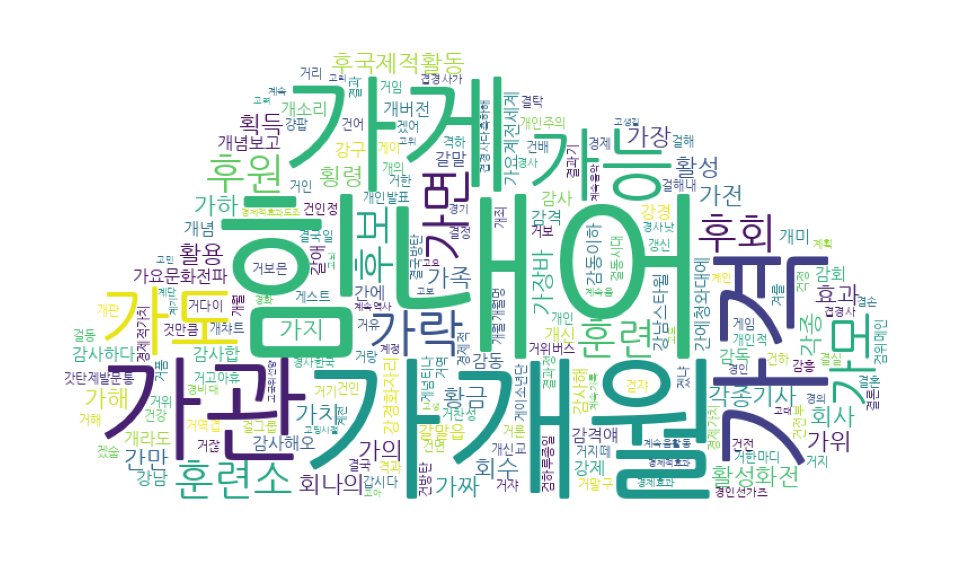

In [91]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4))
plt.imshow(imgWC)
plt.axis('off')

In [92]:
# 기말고사 예상

In [93]:
df = pd.DataFrame({
    'A' :[1,2,3],
    'B' : [10,20,30]
})
df

,A,B
0,1,10
1,2,20
2,3,30


In [98]:
print(df.apply(lambda x:x.max() - x.min()))

A     2
B    20
dtype: int64


In [95]:
print(df.apply(lambda x:x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [97]:
print(df.apply(lambda x:x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [100]:
f

<function __main__.<lambda>(x)>

In [99]:
f = lambda x:x +5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [102]:
f = lambda x:x *5
df.apply(f)

,A,B
0,5,50
1,10,100
2,15,150


In [103]:
f = lambda x:x / 5
df.apply(f, axis = 1)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [104]:
print(df.apply(lambda x:x.mean(), axis=0))

A     2.0
B    20.0
dtype: float64


In [105]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [106]:
df.apply(lambda x:x.sum(), axis=0)

,0
A,6
B,60


In [107]:
df.apply(sum, axis=0)

,0
A,6
B,60


In [108]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [109]:
df.sum()

,0
A,6
B,60


In [110]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [111]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobbies': [['reading', 'cooking'], ['gaming']]
})
print(df)

    name             hobbies
0  Alice  [reading, cooking]
1    Bob            [gaming]


In [114]:
df_exploded = df.explode('hobbies')
df_exploded

,name,hobbies
0,Alice,reading
0,Alice,cooking
1,Bob,gaming


In [115]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [117]:
display_side_by_side(df, df_exploded) #시험예상

,name,hobbies
0,Alice,"[reading, cooking]"
1,Bob,[gaming]
,name,hobbies
0,Alice,reading
0,Alice,cooking
1,Bob,gaming


## 종료